In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf


In [3]:
def count_files_in_folder(folder_path):
    try:
        # Lấy danh sách tất cả các file và thư mục trong folder
        items = os.listdir(folder_path)

        # Đếm số lượng file
        file_count = sum(1 for item in items if os.path.isfile(os.path.join(folder_path, item)))

        return file_count
    except Exception as e:
        print(f"Đã xảy ra lỗi: {e}")
        return None

# Đường dẫn đến folder bạn muốn kiểm tra
folder_path = "/content/drive/MyDrive/MachineLearning/Dog_Cat/training_set/cats"
file_count = count_files_in_folder(folder_path)
if file_count is not None:
    print(f"Số lượng file trong folder: {file_count}")


Số lượng file trong folder: 4000


In [4]:
#  def create_and_copy_images(source_folder, destination_folder, limit=1000):
#      # Tạo thư mục đích nếu chưa tồn tại
#      os.makedirs(destination_folder, exist_ok=True)

#      # Lấy danh sách các file trong thư mục nguồn
#      files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

#      # Chỉ lấy số lượng file giới hạn
#      for file in files[:limit]:
#          source_path = os.path.join(source_folder, file)
#          destination_path = os.path.join(destination_folder, file)

#          # Sao chép file từ thư mục nguồn sang thư mục đích
#          shutil.copy(source_path, destination_path)

#  # Đường dẫn đến các folder
#  training_set_folder = "/content/drive/MyDrive/MachineLearning/Dog_Cat/training_set"
#  training_folder = "/content/drive/MyDrive/MachineLearning/Dog_Cat/Training"

#  # Tạo folder training với các folder con
#  cats_destination_folder = os.path.join(training_folder , "cats")
#  dogs_destination_folder = os.path.join(training_folder , "dogs")

#  # Tạo folder training nếu chưa tồn tại
#  os.makedirs(training_folder , exist_ok=True)

#  # Sao chép 200 bức ảnh từ folder cats
#  create_and_copy_images(os.path.join(training_set_folder, "cats"), cats_destination_folder, limit=1000)

#  # Sao chép 200 bức ảnh từ folder dogs
#  create_and_copy_images(os.path.join(training_set_folder, "dogs"), dogs_destination_folder, limit=1000)




In [5]:
def list_files_in_folder(folder_path):
    # Lấy danh sách các file trong thư mục
    return [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Đường dẫn đến các thư mục con
cats_destination_folder = "/content/drive/MyDrive/MachineLearning/Dog_Cat/Training/cats"
dogs_destination_folder = "/content/drive/MyDrive/MachineLearning/Dog_Cat/Training/dogs"

# Hiển thị danh sách các file trong thư mục "cats"
cats_files = list_files_in_folder(cats_destination_folder)
print("Số lượng ảnh của con mèo sau khi cắt", len(cats_files))

# Hiển thị danh sách các file trong thư mục "dogs"
dogs_files = list_files_in_folder(dogs_destination_folder)
print("Số lượng ảnh của con chó sau khi cắt", len(dogs_files))

Số lượng ảnh của con mèo sau khi cắt 1000
Số lượng ảnh của con chó sau khi cắt 1000


In [6]:
#  def create_and_copy_images(source_folder, destination_folder, limit=200):
#      # Tạo thư mục đích nếu chưa tồn tại
#      os.makedirs(destination_folder, exist_ok=True)

#      # Lấy danh sách các file trong thư mục nguồn
#      files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

#      # Chỉ lấy số lượng file giới hạn
#      for file in files[:limit]:
#          source_path = os.path.join(source_folder, file)
#          destination_path = os.path.join(destination_folder, file)

#          # Sao chép file từ thư mục nguồn sang thư mục đích
#          shutil.copy(source_path, destination_path)

#  # Đường dẫn đến các folder
#  training_set_folder = "//content/drive/MyDrive/MachineLearning/Dog_Cat/test_set"
#  training_folder = "/content/drive/MyDrive/MachineLearning/Dog_Cat/Test"

#  # Tạo folder training với các folder con
#  cats_destination_folder = os.path.join(training_folder , "cats")
#  dogs_destination_folder = os.path.join(training_folder , "dogs")

#  # Tạo folder training nếu chưa tồn tại
#  os.makedirs(training_folder , exist_ok=True)

#  # Sao chép 200 bức ảnh từ folder cats
#  create_and_copy_images(os.path.join(training_set_folder, "cats"), cats_destination_folder, limit=200)

#  # Sao chép 200 bức ảnh từ folder dogs
#  create_and_copy_images(os.path.join(training_set_folder, "dogs"), dogs_destination_folder, limit=200)


In [7]:
  def list_files_in_folder(folder_path):
      # Lấy danh sách các file trong thư mục
      return [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

  # Đường dẫn đến các thư mục con
  cats_test = "/content/drive/MyDrive/MachineLearning/Dog_Cat/Test/cats"
  dogs_test = "/content/drive/MyDrive/MachineLearning/Dog_Cat/Test/dogs"

  # Hiển thị danh sách các file trong thư mục "cats"
  cats_test_file = list_files_in_folder(cats_test)
  print("Số lượng ảnh của con mèo sau khi cắt", len(cats_test_file))

  # Hiển thị danh sách các file trong thư mục "dogs"
  dogs_test_file = list_files_in_folder(dogs_test)
  print("Số lượng ảnh của con chó sau khi cắt", len(dogs_test_file))

Số lượng ảnh của con mèo sau khi cắt 200
Số lượng ảnh của con chó sau khi cắt 200


In [8]:
base_path = '/content/drive/MyDrive/MachineLearning/Dog_Cat/Training'
types = os.listdir(base_path)
print(types)

['cats', 'dogs']


In [9]:
 import os
 import pandas as pd

 # Đường dẫn đến thư mục chứa ảnh
 base_path = '/content/drive/MyDrive/MachineLearning/Dog_Cat/Training'
 types = os.listdir(base_path)

 # Danh sách để lưu thông tin ảnh
 dt = []

 # Duyệt qua từng loại ảnh (cats và dogs)
 for item in types:
     # Lấy tất cả file ảnh trong thư mục
     all_type = os.listdir(os.path.join(base_path, item))
     for img in all_type:
         # Tạo đường dẫn đầy đủ cho ảnh
         img_path = os.path.join(base_path, item, img)

         # Xác định label: 0 cho cats và 1 cho dogs
         label = 0 if item == 'cats' else 1

         # Thêm tuple (img_path, label, item) vào danh sách
         dt.append((img_path, label, item))

 # Tạo DataFrame từ danh sách dt
 df = pd.DataFrame(dt, columns=['image_path', 'label', 'type'])

 # Đường dẫn tới file CSV mà bạn muốn lưu
 csv_file_path = '/content/drive/MyDrive/MachineLearning/Dog_Cat/image_labels.csv'

 # Ghi DataFrame vào file CSV
 df.to_csv(csv_file_path, index=False)

 print("File CSV đã được tạo thành công tại:", csv_file_path)


File CSV đã được tạo thành công tại: /content/drive/MyDrive/MachineLearning/Dog_Cat/image_labels.csv


In [10]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Dog_Cat/image_labels.csv')

In [11]:
df

,image_path,label,type
0,/content/drive/MyDrive/MachineLearning/Dog_Cat...,0,cats
1,/content/drive/MyDrive/MachineLearning/Dog_Cat...,0,cats
2,/content/drive/MyDrive/MachineLearning/Dog_Cat...,0,cats
3,/content/drive/MyDrive/MachineLearning/Dog_Cat...,0,cats
4,/content/drive/MyDrive/MachineLearning/Dog_Cat...,0,cats
...,...,...,...
1995,/content/drive/MyDrive/MachineLearning/Dog_Cat...,1,dogs
1996,/content/drive/MyDrive/MachineLearning/Dog_Cat...,1,dogs
1997,/content/drive/MyDrive/MachineLearning/Dog_Cat...,1,dogs
1998,/content/drive/MyDrive/MachineLearning/Dog_Cat...,1,dogs


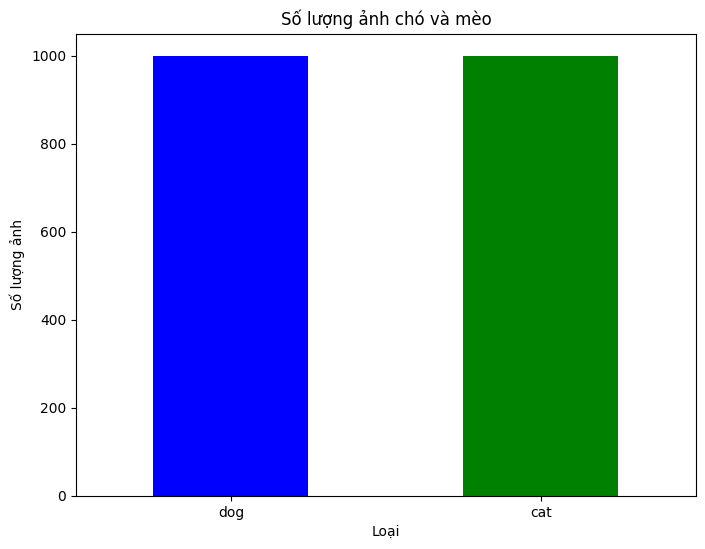

In [12]:
# Đổi nhãn từ số sang tên loại
label_map = {0: 'dog', 1: 'cat'}
df['Type'] = df['label'].map(label_map)

# Đếm số lượng ảnh cho mỗi loại
type_counts = df['Type'].value_counts()

# Trực quan hóa kết quả bằng biểu đồ thanh
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=['blue', 'green'])
plt.title("Số lượng ảnh chó và mèo")
plt.xlabel("Loại")
plt.ylabel("Số lượng ảnh")
plt.xticks(rotation=0)
plt.show()

In [13]:
# Hàm resize_images_in_folder nhận vào thư mục gốc và kích thước mong muốn
def resize_images_in_folder(root_folder, imsize=64):
    images = []
    labels = []
    # Lấy tất cả thư mục con trong thư mục gốc
    types = os.listdir(root_folder)

    for folder in types:
        folder_path = os.path.join(root_folder, folder)
        # Kiểm tra nếu folder_path là một thư mục
        if os.path.isdir(folder_path):
            filenames = os.listdir(folder_path)
            for f in filenames:
                img_path = os.path.join(folder_path, f)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (imsize, imsize))
                    images.append(img)
                    labels.append(folder)
                else:
                    print(f"Failed to load image: {img_path}")

    return images, labels

# Sử dụng hàm resize_images_in_folder với đường dẫn thư mục
resize_image_train = '/content/drive/MyDrive/MachineLearning/Dog_Cat/Training'
x_train,y_train = resize_images_in_folder(resize_image_train)

resize_image_test = '/content/drive/MyDrive/MachineLearning/Dog_Cat/Test'
x_test,y_test = resize_images_in_folder(resize_image_test)


In [14]:
def prepare_images_array(images):
    # Chuyển danh sách ảnh thành mảng numpy
    images_array = np.array(images, dtype='float32')

    # Chuẩn hóa giá trị ảnh về khoảng [0, 1]
    images_array /= 255.0

    # Trả về mảng ảnh đã chuẩn hóa và kích thước của nó
    return images_array, images_array.shape

x_train, x_train_shape= prepare_images_array(x_train)
x_test, x_test_shape= prepare_images_array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 64, 64, 3)
(400, 64, 64, 3)
(2000,)
(400,)


In [15]:
# Khởi tạo LabelEncoder
y_labelencoder = LabelEncoder()

# Mã hóa nhãn cho y_train và y_test
y_train = y_labelencoder.fit_transform(y_train)
y_test= y_labelencoder.transform(y_test)

# Kiểm tra nhãn sau khi mã hóa
print(np.unique(y_train))
print(np.unique(y_test))

[0 1]
[0 1]


In [16]:
model = keras.models.Sequential([
    # Flatten layer to reshape input
    keras.layers.Flatten(input_shape=(64, 64, 3)),

    keras.layers.Dense(512, activation=tf.nn.relu),

    # Second Dense Layer with BatchNorm and Dropout
    keras.layers.Dense(256, activation=tf.nn.relu),

    # Third Dense Layer with BatchNorm and Dropout
    keras.layers.Dense(128, activation=tf.nn.relu),

    # Output Layer
    keras.layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,291,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,456,450 (24.63 MB)

 Trainable params: 6,456,450 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.000001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5066 - loss: 0.7092
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5473 - loss: 0.6841
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5935 - loss: 0.6738
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5958 - loss: 0.6680
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6237 - loss: 0.6636
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6260 - loss: 0.6572
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6260 - loss: 0.6569
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 0.6555
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6314 - loss: 0.6525
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6522 - loss: 0.6477
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6415 - loss: 0.6452
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [20]:
# model.save('/content/drive/MyDrive/MachineLearning/WebPage.h5')

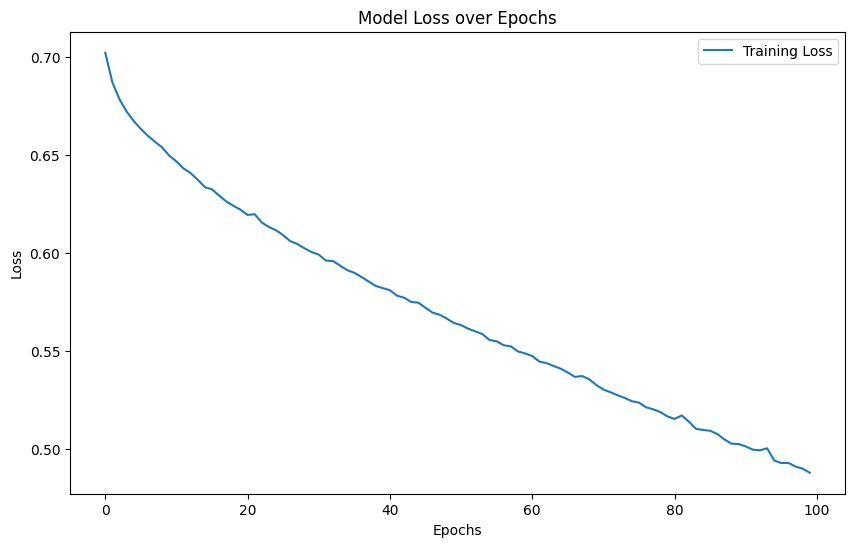

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy on the test set: 59.50%
Classification Report:
               precision    recall  f1-score   support

        cats       0.59      0.64      0.61       200
        dogs       0.60      0.55      0.58       200

    accuracy                           0.59       400
   macro avg       0.60      0.59      0.59       400
weighted avg       0.60      0.59      0.59       400



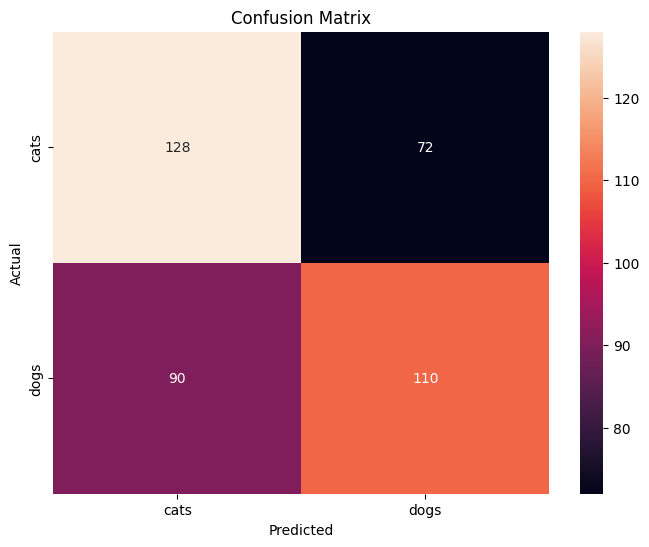

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score


predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Đảm bảo class_labels là danh sách các chuỗi
class_labels = list(map(str, y_labelencoder.classes_))

accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


# Sử dụng class_labels trong classification_report và heatmap
class_report = classification_report(y_test, predicted_classes, target_names=class_labels)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, predicted_classes)

# Vẽ heatmap cho ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
import cv2
import numpy as np

# Define the prediction function
def predict(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, (64, 64))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Make the prediction
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction, axis=1)
        print(f"Predicted class: {y_labelencoder.inverse_transform(predicted_label)}")
    else:
        print(f"Failed to load image: {image_path}")

# Get the image path from user input
img_path = input('Nhập đường dẫn ảnh: ')
predict(img_path)


Nhập đường dẫn ảnh: .
Failed to load image: .
